In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('T:\Data\dulieuxettuyendaihoc.csv',header=0,delimiter=',',encoding='utf-8')
df

print(f'{df["M1"].min()}\n{df["M1"].max()}\n')
print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')
print(f'{df["KT"].mode()}\n')
print(f'{df["M1"].quantile(0.25)}\n')


<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\thanh\AppData\Local\Temp\ipykernel_15200\891248133.py:5: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('T:\Data\dulieuxettuyendaihoc.csv',header=0,delimiter=',',encoding='utf-8')


1.0
7.0

3.74
3.625

0    A
Name: KT, dtype: object

2.5



In [5]:
#range(dai luong bien do dao dong)
range = df['M1'].max() - df['M1'].min()
range

np.float64(6.0)

In [4]:
#IQR
iqr = df['M1'].quantile(0.75) - df['M1'].quantile(0.25)
iqr

np.float64(2.25)

In [6]:
#do lech trung binh
deltaD = np.mean(np.abs(df['M1'] - np.mean(df['M1'])))
deltaD

np.float64(1.1600000000000001)

In [7]:
#tinh khoang range M1&M2
df[['M1','M2']].max() - df[['M1','M2']].min()


M1    6.0
M2    6.5
dtype: float64

In [8]:
iqr1 = df['M1'].quantile(0.75) - df['M1'].quantile(0.25)
iqr1
iqr2 = df['M2'].quantile(0.75) - df['M2'].quantile(0.25)
iqr2

iqr1 - iqr2

np.float64(1.0)

In [13]:
deltaD1 = np.mean(np.abs(df['M1'] - np.mean(df['M1'])))
deltaD1
deltaD2 = np.mean(np.abs(df['M2'] - np.mean(df['M2'])))
deltaD2
deltaD2 - deltaD1

np.float64(-0.35980000000000034)

In [11]:
#Phuong sai
df['M1'].var()
#Do lech chuan
df['M1'].std()

np.float64(1.424408436488423)

In [14]:

print(df[['M1','M2']].mean())
print(df[['M1','M2']].std())

M1    3.740
M2    4.255
dtype: float64
M1    1.424408
M2    1.060053
dtype: float64


In [15]:
#CV
#So sanh muc do bien dong M1 vaf M2
df[['M1','M2']].std()/df[['M1','M2']].mean()

M1    0.380858
M2    0.249131
dtype: float64

In [16]:
#su dung CV so sanh muc do phan tan M1,2,3
df[['M1','M2','M3']].std()/df[['M1','M2','M3']].mean()

M1    0.380858
M2    0.249131
M3    0.213566
dtype: float64

In [17]:
#Mo ta bien dinh luong
df['M1'].describe()

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: M1, dtype: float64

In [18]:
df[['M1','M2','M3']].describe()

,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [24]:

cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
list(cv)
#viet code de tim ra nhung mon nao co do on dinh nhat
cv.max

<bound method Series.max of M1    0.380858
M2    0.249131
M3    0.213566
dtype: float64>

In [27]:
#nhom nao thi M2 tot hon
df.groupby('GT')['M1'].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [28]:
#Tinh CV cho M1 theo nhom gioi tinh
df.groupby('GT')['M1'].std()/df.groupby('GT')['M1'].mean()

GT
F    0.349905
M    0.411677
Name: M1, dtype: float64

In [29]:
#sinh vien nam thi mon nao tot hon
df.groupby('GT')['M2'].std()/df.groupby('GT')['M2'].mean()


GT
F    0.252518
M    0.240146
Name: M2, dtype: float64

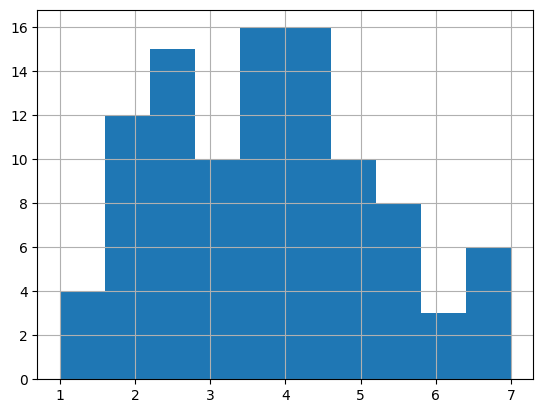

In [30]:
#bieu do histofram la bieu do mo ta phan phoi xac xuat bien dong 
df['M1'].hist()
plt.show()

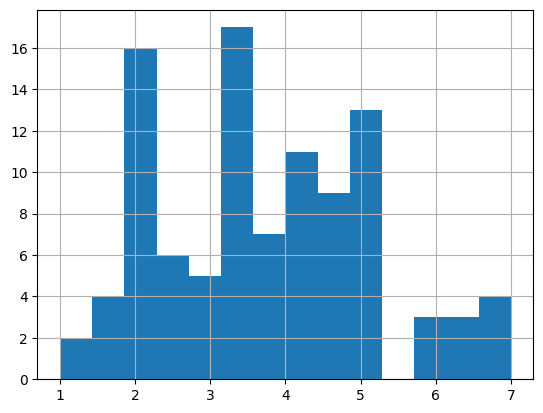

In [31]:
df['M1'].hist(bins=14)
plt.show()

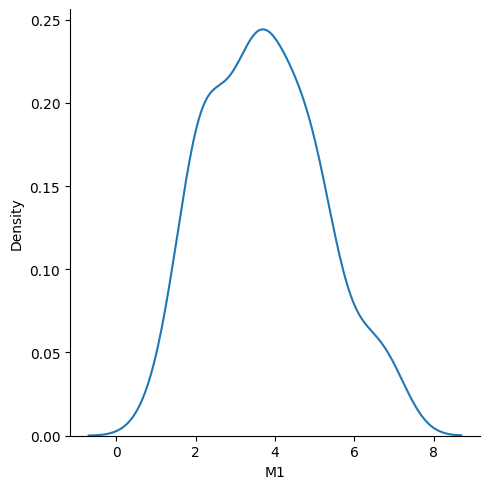

In [32]:
#phan phoi xac suat
sns.displot(df, x='M1', kind='kde')
plt.show()


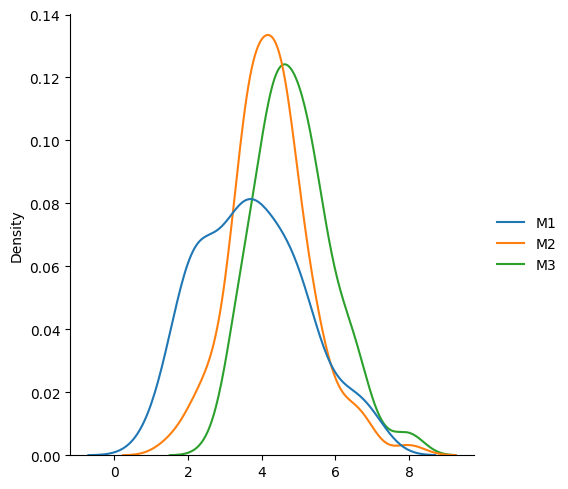

In [33]:
sns.displot(data = df[['M1','M2','M3']], kind='kde')
plt.show()

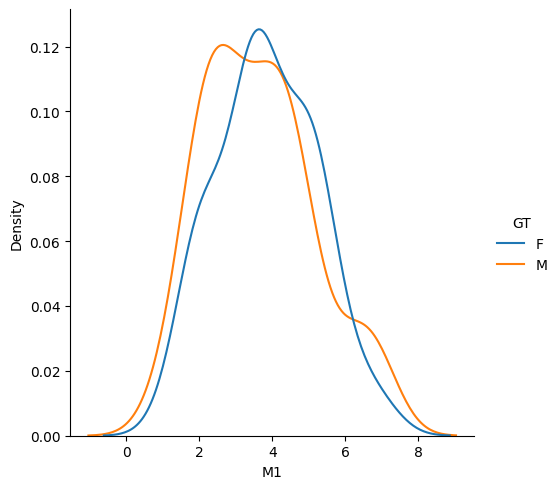

In [34]:
sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()

In [35]:
#do xien (skewness)
df['M1'].skew()

np.float64(0.33322084231625376)

In [36]:
df[['M1','M2','M3']].skew()

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

In [37]:
# excess kurtosis de danh gia do nhon
# kurtosis > 0 -> thin
# kurtosis = 0 -> fit
# kurtosis < 0 -> fat
df[['M1']].kurtosis()

M1   -0.517004
dtype: float64

In [38]:
df[['M1','M2','M3']].kurtosis()

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

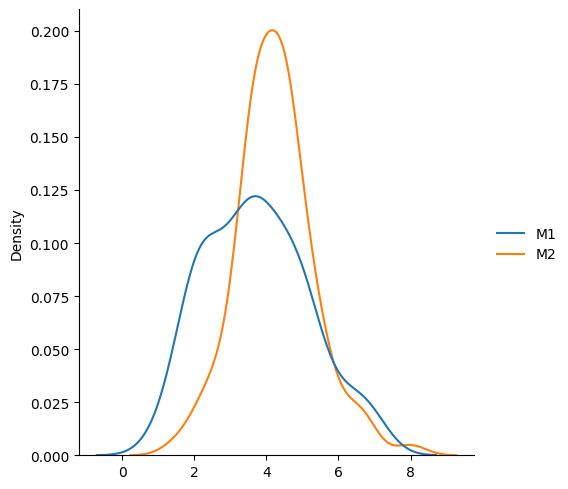

In [39]:
#
sns.displot(data = df[['M1','M2']], kind='kde')
plt.show()

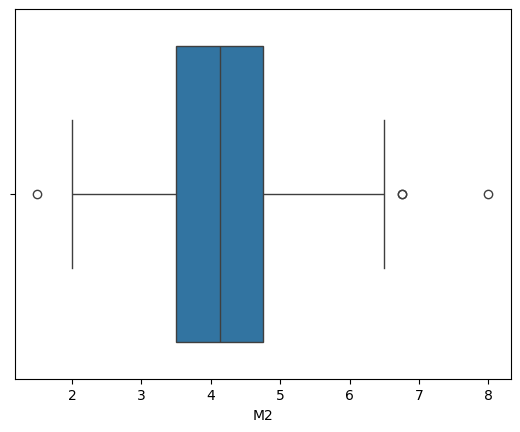

In [44]:
#bieu do boxsplot
sns.boxplot(data=df['M2'], orient="h")
plt.show()

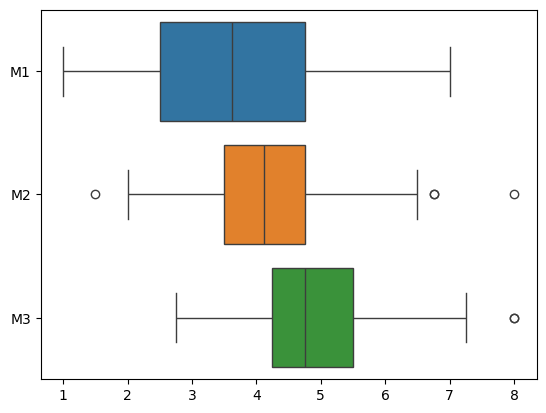

In [41]:
sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()

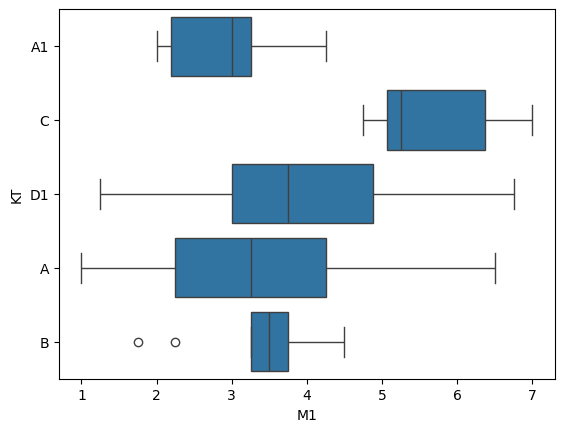

In [42]:
sns.boxplot(x='M1', y='KT',data=df, orient='h')
plt.show()


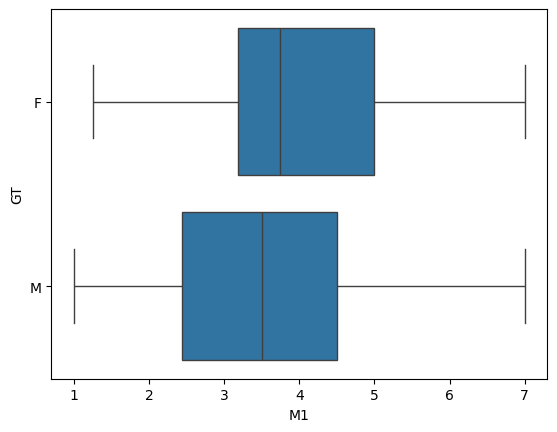

In [43]:
sns.boxplot(x='M1', y='GT',data=df, orient='h')
plt.show()

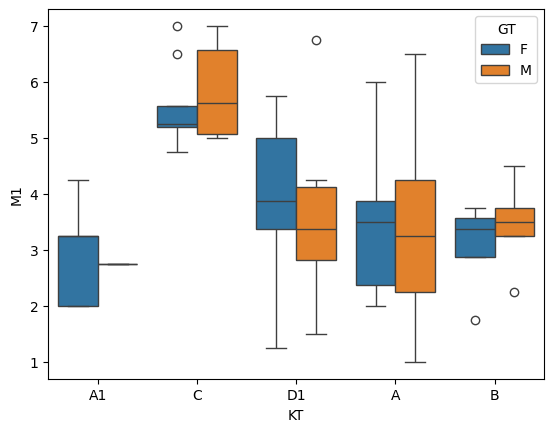

In [45]:
sns.boxplot(x='KT', y='M1',hue='GT',data=df)
plt.show()

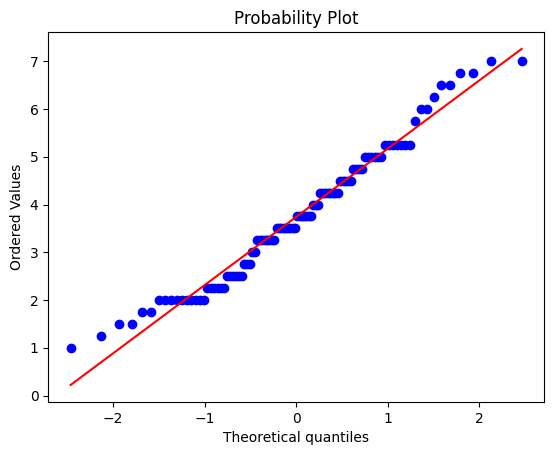

In [64]:
from scipy import stats
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()

In [57]:
df[['M1','M2']].cov()

,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


In [58]:
df[['M1','M2']].corr()


,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


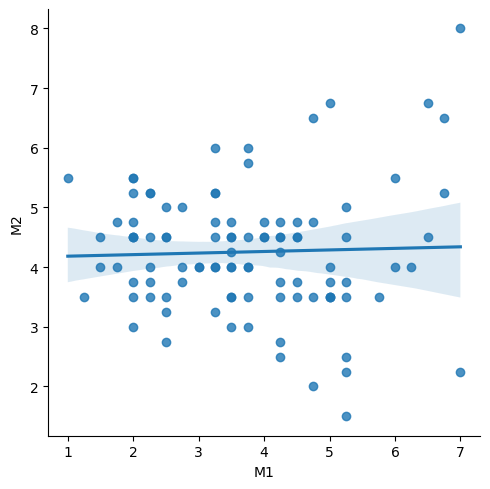

In [59]:
sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()

In [60]:
df[['M1','M2','M3']].corr()

,M1,M2,M3
M1,1.000000,0.035154,0.018731
M2,0.035154,1.000000,-0.091523
M3,0.018731,-0.091523,1.000000


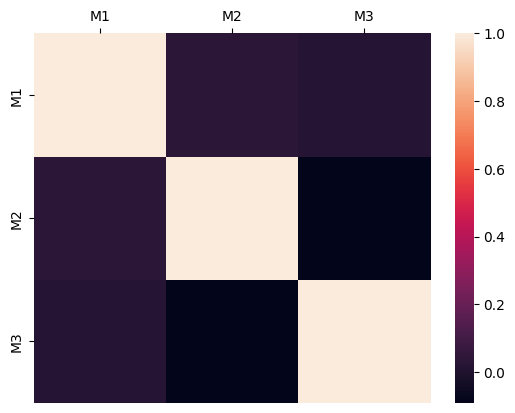

In [61]:
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()


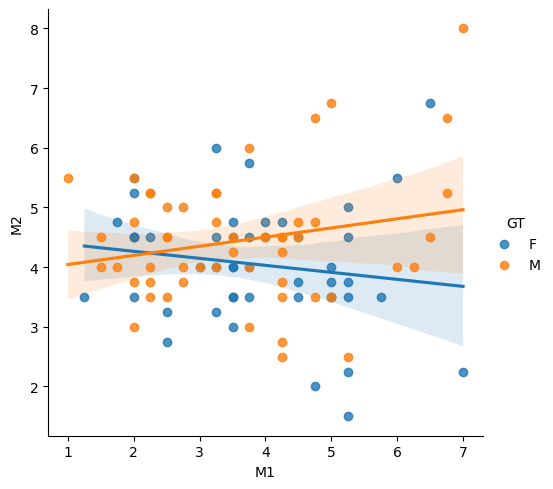

In [62]:
sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()


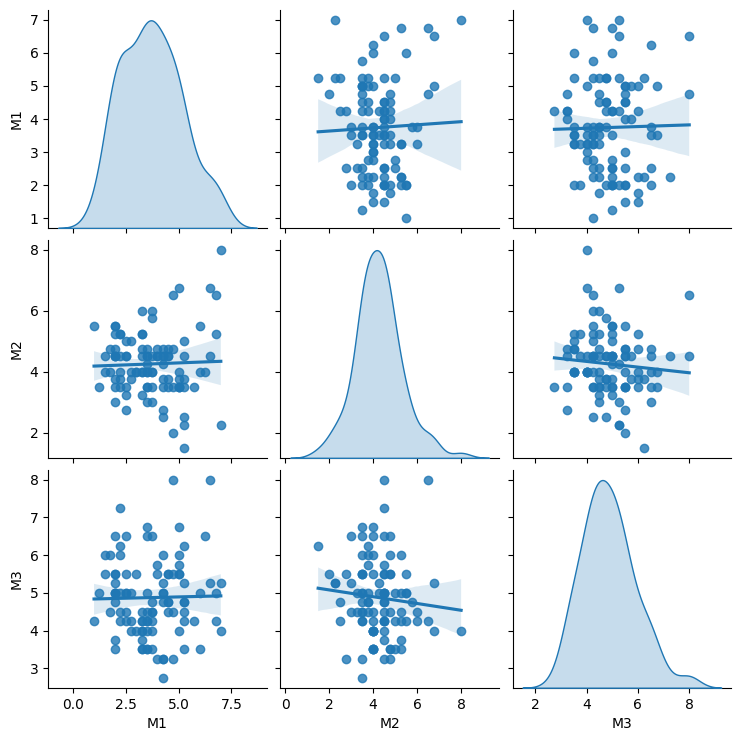

In [63]:
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()
